# INSTABOT - PART 2

In [14]:
#files used
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
import matplotlib.pyplot as plt

In [15]:
#Establishing a driver connection 
driver = webdriver.Edge(executable_path = "C:\\Users\\vanib\\Desktop\\data_science\\msedgedriver.exe")

In [16]:
#opening instagram
driver.get('https://www.instagram.com/')
wait = WebDriverWait(driver, 10)#Waiting for 10 seconds
wait.until(EC.presence_of_element_located((By.NAME, "username")))#Wait for the input box for username
#logging in to instagram
username = driver.find_element_by_name("username")
username.send_keys('SAMPLE USERNAME')

wait = WebDriverWait(driver, 10) #Waiting for 10 seconds
wait.until(EC.presence_of_element_located((By.NAME, "password"))) #Wait for the input box for password
password = driver.find_element_by_name("password")
password.send_keys('SAMPLE PASSWORD')

password.submit()

Functions used..

In [17]:
##function for calculating number of followers
def numfollowers() :
    time.sleep(2)
    number = driver.find_elements_by_class_name("g47SY")

    followers = number[1].get_attribute("title")
    if("," in followers):
        string = ""
        li = followers.split(",")
        for i in range(len(li)):
            string = string + li[i]
        intfollowers = int(string)
        return intfollowers
    else:
        intfollowers = int(followers)
        return intfollowers
    

In [18]:
## function for visiting a profile on instagram
def visit(name):
    search_box = driver.find_element_by_xpath("//input[contains(@class, 'XTCLo')]")
    search_box.clear()
    
    search_box.send_keys(name)
    time.sleep(4)#waiting for results to load
    
    insta_handle = driver.find_element_by_class_name("Ap253")
    insta_handle.click()
    time.sleep(4)
    
    return

From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [28]:
#searching for 'food' in search box
typeField = driver.find_element_by_xpath("//input[contains(@class, 'XTCLo')]") #loating the search box
typeField.send_keys("food") # searching for food in the search box


wait = WebDriverWait(driver, 30) #Waiting for 10 seconds
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "Ap253"))) #Precaution if something happens

acc_name = driver.find_elements_by_class_name("Ap253") #Finding the class which contains data
count = 1 #To count the number of accounts

handles = []##list for extarcting the top 10 handles 

for i in range(len(acc_name)):
    if("#" not in acc_name[i].text and acc_name[i].text != "Food Garage HUDA"  and count <= 10): 
        handles.append(acc_name[i].text)
        count += 1 
        
num_of_followers = {}## for finding the top 5 handles with maximum followers

for i in range (len(handles)):
    
    visit(accountList[i])
    total_followers = numfollowers()
    num_of_followers[handles[i]] = total_followers
    
sortedDict = {k: v for k, v in sorted(num_of_followers.items(), key=lambda item: item[1], reverse = True)}##sorting the dictionary on the basis of followers in ascneding order
profiles = list(sortedDict.keys())
print("-" * 50)
print("Top 5 profiles with highest followers are")
print("-" * 50)
topFive = []
for j in range(5):
    topFive.append(profiles[j])
    print(profiles[j])
print("-" * 50)

--------------------------------------------------
Top 5 profiles with highest followers are
--------------------------------------------------
foodys
yourfoodlab
dilsefoodie
foodtalkindia
thisisdelhi
--------------------------------------------------


Now Find the number of posts these handles have done in the previous 3 days.

In [29]:
postNumber = []
for i in topFive:
    visit(i)
    wait = WebDriverWait(driver, 30) #Waiting for 10 seconds
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    imageLikes = driver.find_element_by_class_name("_9AhH0")
    imageLikes.click()
    wait = WebDriverWait(driver, 30) #Waiting for 30 seconds
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_97aPb ")))
    #duration = driver.find_element_by_xpath("//time[contains(@class, '_1o9PC')]")
    count = 0
    while True:
        duration = driver.find_element_by_xpath("//time[contains(@class, '_1o9PC')]")
        if('HOUR' in duration.text  or '1 DAY' in duration.text or '2 DAYS' in duration.text or '3 DAYS' in duration.text or 'SECOND' in duration.text or 'MINUTES' in duration.text):
            count += 1
            waitNext = WebDriverWait(driver, 30)
            waitNext.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, '_65Bje')]"))) #Precaution if something happens
            nextButton = driver.find_element_by_xpath("//a[contains(@class, '_65Bje')]") #next button for next image preview
            nextButton.click() #clicking next button
            wait = WebDriverWait(driver, 30) #Waiting for 30 seconds
            wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_97aPb ")))
        else:
            ImageClose = driver.find_elements_by_class_name("wpO6b")
            ImageClose[-1].click()
            break
            
    postNumber.append(count)
for i in range(5):
    print(topFive[i], "posted", postNumber[i], "posts in previous 3 days.")

foodys posted 10 posts in previous 3 days.
yourfoodlab posted 3 posts in previous 3 days.
dilsefoodie posted 2 posts in previous 3 days.
foodtalkindia posted 3 posts in previous 3 days.
thisisdelhi posted 4 posts in previous 3 days.


Depict this information using a suitable graph.

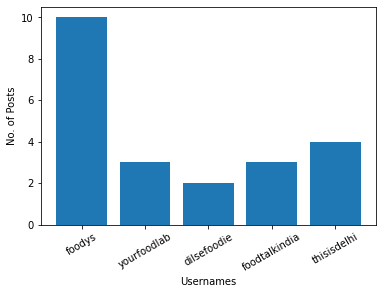

In [30]:
plt.bar(topFive, postNumber)
plt.xticks(rotation=30)
plt.xlabel("Usernames")
plt.ylabel("No. of Posts")
plt.show()

Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

Create a csv file with two columns : the word and its frequency

In [31]:
import pandas as pd
allWords = []
hashtags = []
for i in topFive:
    count = 1
    time.sleep(2)
    visit(i)
    wait = WebDriverWait(driver, 30) #Waiting for 10 seconds
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    imageLikes = driver.find_element_by_class_name("_9AhH0")
    imageLikes.click()
    while(count <= 10):
        wait = WebDriverWait(driver, 30) #Waiting for 10 seconds
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "C4VMK")))
        
        contentFind = driver.find_element_by_xpath("//div[contains(@class, 'C4VMK')]/span").get_attribute('textContent').strip().split(" ")
        for content in contentFind:
            allWords.append(content)
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span//a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        waitNext = WebDriverWait(driver, 30)
        waitNext.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, '_65Bje')]"))) #Precaution if something happens
        nextButton = driver.find_element_by_xpath("//a[contains(@class, '_65Bje')]") #next button for next image preview
        nextButton.click() #clicking next button
        count += 1
    driver.back()
    driver.back()
    time.sleep(1)
    
df = pd.DataFrame()
final = pd.DataFrame()
df["Words"] = allWords
frequency = list(df['Words'].value_counts().values)
final.to_csv('Hashtg_Frequencies.csv')
words = list(df['Words'].value_counts().index)
final["Words"] = words
final["Frequency"] = frequency
final.to_csv('Hashtg_Frequencies.csv')
print("CSV file has been created to your working directory")


CSV file has been created to your working directory


Now, find the hashtags that were most popular among these bloggers

In [32]:
hashTags = []
for i in hashtags:
    if(i[0] == "#"):
        hashTags.append(i[1:])
hashTagCount = pd.DataFrame()
hashTagCount["hashtags"] = hashTags

tag = list(hashTagCount['hashtags'].value_counts().index)[0:6]
frequent = list(hashTagCount['hashtags'].value_counts().values)[0:6]
print("Top 5 hashtags are: ")
print()
for i in range(len(tag)):
    print(tag[i], ":", frequent[i])

Top 5 hashtags are: 

foodforlife : 16
streetfood : 14
dilsefoodie : 10
foodphotography : 10
spicy : 9
homemade : 9


Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

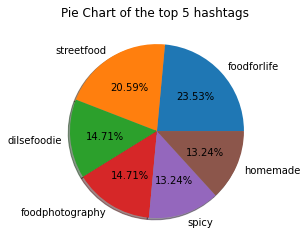

In [33]:
plt.pie(frequent, labels = tag, autopct='%.2f%%', shadow=True)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [23]:
TotalList = []
for user in topFive:
    count = 1
    time.sleep(2)
    visit(user)
    wait = WebDriverWait(driver, 30) #Waiting for 10 seconds
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_9AhH0")))
    imageLikes = driver.find_element_by_class_name("_9AhH0")
    imageLikes.click()
    TotalLikes = 0
    while(count <= 10):
        try:
            wait = WebDriverWait(driver, 6) #Waiting for 10 seconds
            wait.until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, 'Nm9Fw')]/button/span")))
            likeFind = driver.find_element_by_xpath('//div[contains(@class, "Nm9Fw")]/button/span')
            currentLikes = likeFind.text
        except:
            wait = WebDriverWait(driver, 10) #Waiting for 10 seconds
            wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "vcOH2")))
            viewFind = driver.find_element_by_class_name('vcOH2')
            viewFind.click()
            wait = WebDriverWait(driver, 10) #Waiting for 10 seconds
            wait.until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, 'vJRqr')]/span")))
            likeFind = driver.find_element_by_xpath('//div[contains(@class, "vJRqr")]/span')
            currentLikes = likeFind.text
            body = driver.find_element_by_class_name('QhbhU')
            body.click()
            
        if("," in currentLikes):
            k = ""
            a = currentLikes.split(",")
            for j in range(len(a)):
                k = k + a[j]
            currentLikes = int(k)
        else:
            currentLikes = int(currentLikes)
        TotalLikes = TotalLikes + currentLikes
        waitNext = WebDriverWait(driver, 30)
        waitNext.until(EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, '_65Bje')]"))) #Precaution if something happens
        nextButton = driver.find_element_by_xpath("//a[contains(@class, '_65Bje')]") #next button for next image preview
        nextButton.click()
        count += 1
    TotalList.append(TotalLikes)
    ImageClose = driver.find_elements_by_class_name("wpO6b")
    ImageClose[-1].click()
print("Likes for each Handle are: ")
print()
for i in range(5):
    print(profiles[i], ":", TotalList[i])

Likes for each Handle are: 

foodys : 135420
yourfoodlab : 284010
dilsefoodie : 113857
foodtalkindia : 5164
thisisdelhi : 33874


Calculate the average likes for a handle.

In [24]:
import numpy as np
TotalList = np.array(TotalList)
avgLikes = (TotalList/10)
print("Average Likes for each handle are: ")
print()
for i in range(5):
    print(profiles[i], ":", avgLikes[i])

Average Likes for each handle are: 

foodys : 13542.0
yourfoodlab : 28401.0
dilsefoodie : 11385.7
foodtalkindia : 516.4
thisisdelhi : 3387.4


Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [25]:
NumberOfFollowers = list(sortedDict.values())[:5]
followersLikes = NumberOfFollowers / avgLikes
print("Followers : Likes Ratio is: ")
print()
for i in range(5):
    print(profiles[i], ":", followersLikes[i])

Followers : Likes Ratio is: 

foodys : 661.9971939152267
yourfoodlab : 51.689975705080805
dilsefoodie : 58.45385000483062
foodtalkindia : 586.1599535243997
thisisdelhi : 48.59508767786503


Create a bar graph to depict the above obtained information.

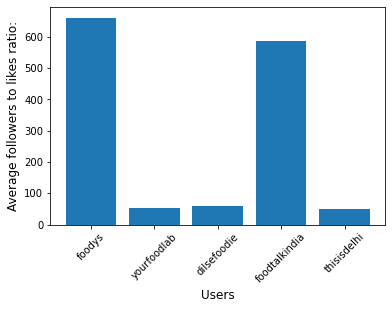

In [27]:
a = [100.23, 200.23, 200.23, 200.23, 200.23]
plt.bar(topFive, followersLikes)
plt.xticks(rotation=45)
plt.xlabel('Users', size=12)
plt.ylabel('Average followers to likes ratio:', size=12)
plt.show()